In [1]:
import pandas as pd
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
from sklearn.ensemble import IsolationForest
import numpy as np

pio.templates.default = "plotly_white"

## Loading Dataset

In [44]:
data = pd.read_csv("Queries.csv")
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


## Checking for Null Values

In [15]:
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64


## Checking the column information

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


## Descriptive Statistics

In [17]:
data_describe = data.describe()
data_describe

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


## Converting CTR from a percentage string to a float

In [53]:
data['CTR'] = data['CTR'].str.rstrip('%').astype('float') / 100.0
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


## Word Frequency Analysis

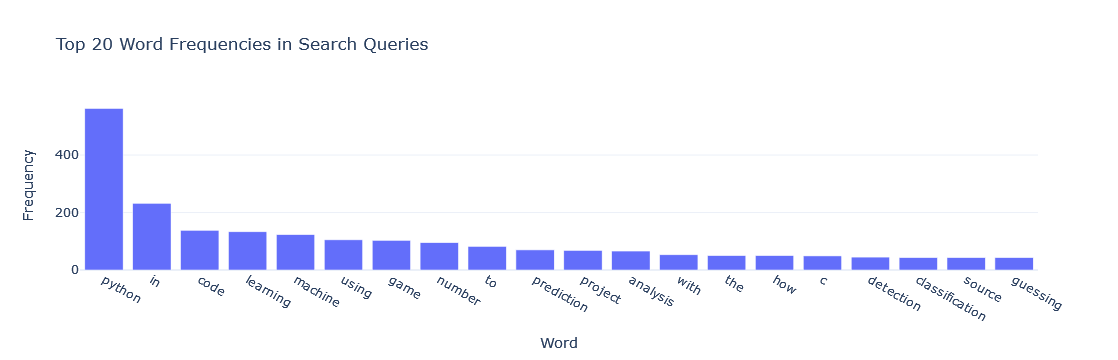

In [59]:
data['Top Queries'] = data['Top queries'].astype(str)
all_queries = ' '.join(data['Top queries'])
cleaned_queries = re.sub(r'[^a-zA-Z\s]', '', all_queries).lower()
words = cleaned_queries.split()
word_freq = Counter(words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

fig = px.bar(word_freq_df.head(20), x='Word', y='Frequency', title='Top 20 Word Frequencies in Search Queries')
fig.show()

## Top queries by clicks

In [63]:
top_clicks = data.sort_values(by='Clicks', ascending=False).head(10)
print("Top 10 Queries by Clicks:\n", top_clicks[['Top queries', 'Clicks']])

Top 10 Queries by Clicks:
                                  Top queries  Clicks
0                number guessing game python    5223
1                        thecleverprogrammer    2809
2           python projects with source code    2077
3  classification report in machine learning    2012
4                      the clever programmer    1931
5        standard scaler in machine learning    1559
6                               aman kharwal    1490
7                python turtle graphics code    1455
8      python game projects with source code    1421
9        82 python projects with source code    1343


## Top queries by Impressions

In [ ]:
top_impressions = data.sort_values(by='Impressions', ascending=False).head(10)
print("Top 10 Queries by Impressions:\n", top_impressions[['Top queries', 'Impressions']])


## Queries with the Highest CTRs

In [37]:
highest_ctr = data.sort_values(by='CTR', ascending=False).head(10)
print("Top 10 Queries by CTR:\n", highest_ctr[['Top Queries', 'CTR']])

Top 10 Queries by CTR:
                                            Top Queries     CTR
928                           the cleverprogrammer.com  0.8548
927                          the clever programmer.com  0.8281
1                                  thecleverprogrammer  0.8128
732               the clever programmer python project  0.7857
307    the clever programmer machine learning projects  0.7735
4                                the clever programmer  0.7638
964               python program to send otp to mobile  0.7083
95                        the card game code in python  0.6699
771  write a python program that calculates number ...  0.6632
137  python program to calculate number of seconds ...  0.6585
Bottom 10 Queries by CTR:
                         Top Queries     CTR
929                   python turtle  0.0029
232                  standardscaler  0.0045
423   classification report sklearn  0.0047
544                 standard scaler  0.0048
981                r2 score sklearn 

## Queries with the Lowest CTRs

In [ ]:
lowest_ctr = data.sort_values(by='CTR', ascending=True).head(10)
print("Bottom 10 Queries by CTR:\n", lowest_ctr[['Top Queries', 'CTR']])

## Correlation matrix

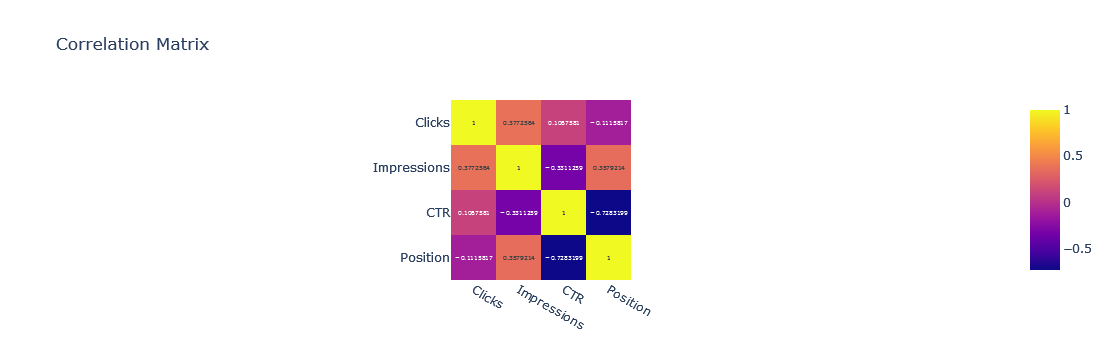

Correlation Matrix:
                Clicks  Impressions       CTR  Position
Clicks       1.000000     0.377256  0.106758 -0.111582
Impressions  0.377256     1.000000 -0.331126  0.357921
CTR          0.106758    -0.331126  1.000000 -0.728320
Position    -0.111582     0.357921 -0.728320  1.000000


In [39]:
correlation_matrix = data[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Plot the correlation matrix
fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation Matrix')
fig.show()

# Print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


# Using Isolation Forest for anomaly detection

In [41]:
iso_forest = IsolationForest(contamination=0.05)  # Set contamination to 5%
features = data[['Clicks', 'Impressions', 'CTR', 'Position']]

# Fit the model
data['Anomaly'] = iso_forest.fit_predict(features)

# Show anomalies
anomalies = data[data['Anomaly'] == -1]
print("Detected Anomalies:\n", anomalies)


Detected Anomalies:
                                      Top queries  Clicks  Impressions     CTR  \
0                    number guessing game python    5223        14578  0.3583   
1                            thecleverprogrammer    2809         3456  0.8128   
2               python projects with source code    2077        73380  0.0283   
3      classification report in machine learning    2012         4959  0.4057   
4                          the clever programmer    1931         2528  0.7638   
5            standard scaler in machine learning    1559         7292  0.2138   
6                                   aman kharwal    1490         5752  0.2590   
7                    python turtle graphics code    1455        13585  0.1071   
8          python game projects with source code    1421         4946  0.2873   
9            82 python projects with source code    1343         3562  0.3770   
10                       guess the number python    1287         4569  0.2817   
11     